# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
from random import choices
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [5]:
# your code here
def roll_dice(n):
    return choices(range(1,7), k=n)

rolls = pd.Series(roll_dice(10))
rolls

0    3
1    5
2    4
3    1
4    3
5    3
6    2
7    4
8    6
9    1
dtype: int64

#### 2.- Plot the results sorted by value.

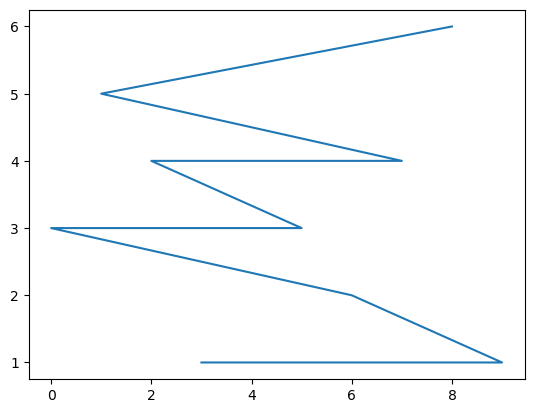

In [6]:
# your code here
rolls = rolls.sort_values()
plt.plot(rolls)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

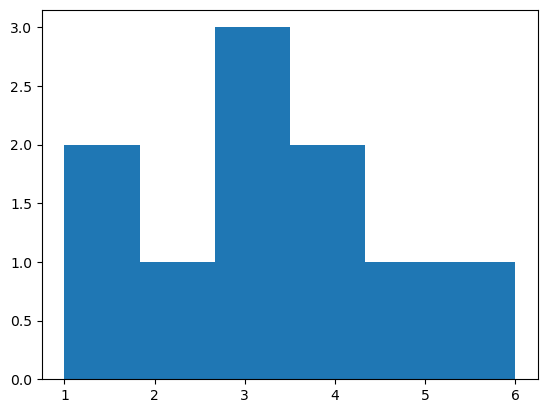

In [7]:
# your code here
plt.hist(rolls, bins=6)
plt.show()

In [21]:
"""
The both show the numbers that occured more often.
"""

'\nThe both show the numbers that occured more often.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def list_avg(lst):
    lst_sum = 0
    for i in lst:
        lst_sum += i
    return lst_sum / len(lst)

list_avg(rolls.tolist())

3.2

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here
freq_dist = [0,0,0,0,0,0]
for i in rolls:
    freq_dist[i-1] += 1
print(freq_dist)
print('Mean of frequency dist. is', list_avg(freq_dist))

[2, 1, 3, 2, 1, 1]
Mean of frequency dist. is 1.6666666666666667


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here
def list_median(lst):
    sorted_list = list(lst)
    sorted_list.sort()
    list_len = len(sorted_list)
    mid_point = list_len // 2
    if list_len % 2 == 0:
        return (sorted_list[mid_point] + sorted_list[mid_point - 1]) / 2
    return sorted_list[mid_point]

a = [1,5,0,3,6,6]
print(list_median(a), a)

4.0 [1, 5, 0, 3, 6, 6]


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
# your code here
def list_quantiles(lst):
    result = [0,0,0,0]
    sorted_list = list(lst)
    sorted_list.sort()
    list_len = len(sorted_list)
    mid_point = list_len // 2
    #first quantile is the median of first half of the list
    result[0] = list_median(sorted_list[0:mid_point])
    # second quantile is the median of the full list
    result[1] = list_median(sorted_list)
    # third quantile is the median of the second half of the list
    result[2] = list_median(sorted_list[mid_point:])
    # last quantile is the last value of the list
    result[3] = sorted_list[-1]
    
    return result

a = [2,2,4,5,5,5,8,9,9,9,12]
print(list_quantiles(a))

[4, 5, 9.0, 12]


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

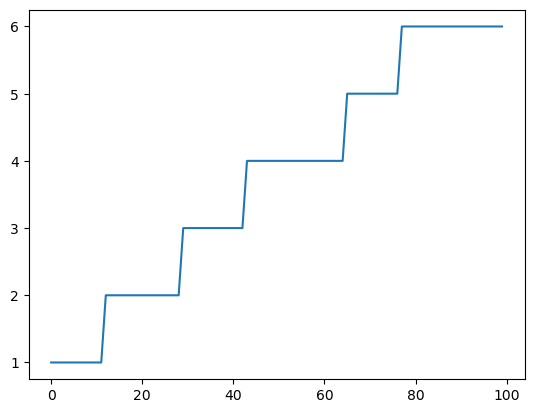

In [22]:
# your code here
data = pd.read_csv('../data/roll_the_dice_hundred.csv')
data = data['value'].tolist()

data.sort()

plt.plot(data)
plt.show()

In [23]:
"""
There are different frequency for each of the numbers, like 4 and 6 has showed up more than others
"""

'\nThere are different frequency for each of the numbers, like 4 and 6 has around 30% of the value each, while others\nseem to be smaller\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [25]:
# your code here
list_avg(data)

3.74

#### 3.- Now, calculate the frequency distribution.


In [31]:
# your code here
def get_freq_dist(d):
    freq_dist = [0,0,0,0,0,0]
    for i in d:
        freq_dist[i-1] += 1
    return freq_dist

print (get_freq_dist(data))
print ('Average frequency: ', list_avg(get_freq_dist(data)))

[12, 17, 14, 22, 12, 23]
Average frequency:  16.666666666666668


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

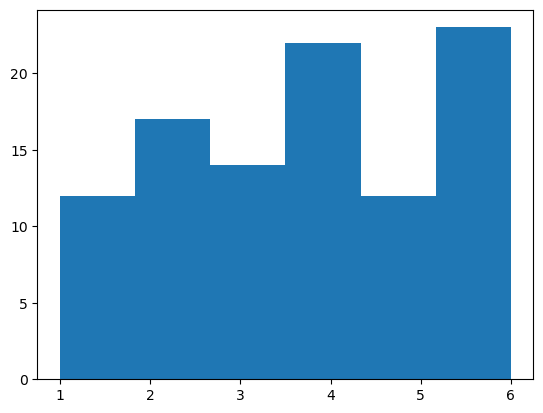

In [28]:
# your code here
plt.hist(data, bins=6)
plt.show()

In [29]:
"""
Because we have more frequency on 4 and 6, the mean value for the whole list is more biased towards those numbers.
"""

'\nBecause we have more frequency on 4 and 6, the mean value for the whole list is more biased towards those numbers.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [32]:
# your code here
data = pd.read_csv('../data/roll_the_dice_thousand.csv')
data = data['value'].tolist()


In [35]:
print (get_freq_dist(data))
print ('Average frequency: ', list_avg(get_freq_dist(data)))

[175, 167, 175, 168, 149, 166]
Average frequency:  166.66666666666666


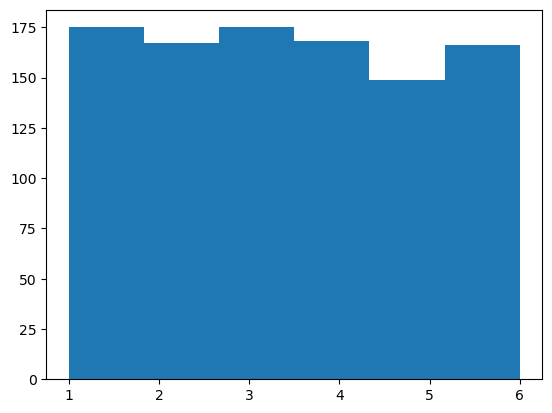

In [34]:
plt.hist(data, bins=6)
plt.show()

In [36]:
"""
The more we throw the dice, the closer frequency distribution will get
"""

'\nThe more we throw the dice, the closer frequency distribution will get\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [39]:
# your code here
ages = pd.read_csv('../data/ages_population.csv')
ages.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


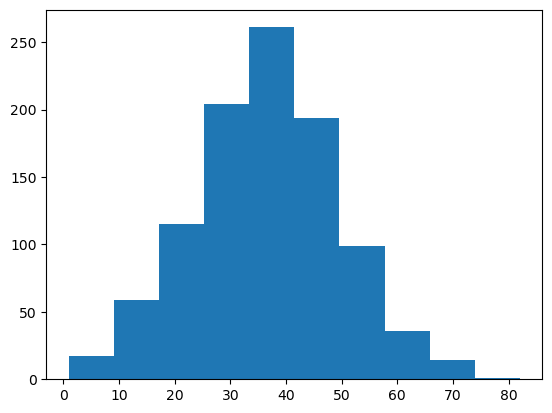

In [41]:
plt.hist(ages, bins=10)
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [43]:
# your code here
print('Mean is:', ages.mean() , '\nSTD is:', ages.std())

Mean is: observation    36.56
dtype: float64 
STD is: observation    12.8165
dtype: float64


In [ ]:
"""
Looking at the histogram, the mean seems to be around 40s, which is close to the value calculated 36.56
And also the STD from the graph looks like within the 15 which is close to 12.8 as we calculated
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

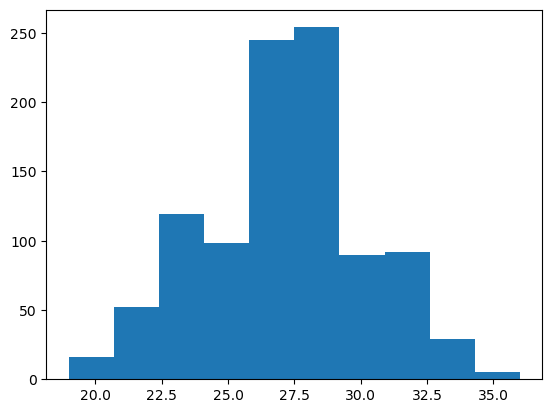

In [44]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')
plt.hist(ages2, bins=10)
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The population here seems to be young people in the age of 20 to 35, with majority at their 25 to 30s. 
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [45]:
# your code here
print('Mean is:', ages2.mean() , '\nSTD is:', ages2.std())

Mean is: observation    27.155
dtype: float64 
STD is: observation    2.969814
dtype: float64


In [ ]:
"""
The majority of the population are on similar age range, close to the mean value
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

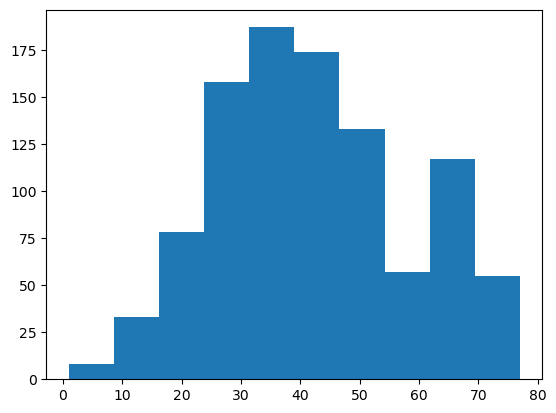

In [46]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
plt.hist(ages3, bins=10)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [47]:
# your code here
print('Mean is:', ages3.mean() , '\nSTD is:', ages3.std())

Mean is: observation    41.989
dtype: float64 
STD is: observation    16.144706
dtype: float64


In [ ]:
"""
The distribution of the data is more biased towards the right side of the range, but majority of the population
are below 50
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [51]:
# your code here
print(list_quantiles(ages3['observation'].tolist()))

[30.0, 40.0, 53.0, 77.0]


In [ ]:
"""
The first 25% are a wide age range group, hence 30 is the first quantile, where as the median is around 40, that 
is less than the mean value of 41.9. That is because the population distribution is more biased towards the 
end of the range, which makes the average value to increase and become more than median value
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [56]:
# your code here
np.quantile(ages3, 0.80)

57.0

In [ ]:
"""
If we use 80% of the data, we can remove the abnormal number of people between age of 60 to 70, which caused the 
mean value get biased
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
Based on the age distributions in the area, we can make following claims:

The frist group, is more of a family based area, hence the distribution of the age range is more uniformed across
all age groups.

In the second group, it seems to have more university students, hence the data is more biased towards young group
of people.

In the last group, based on the frequency distribution and mean value, it is more likely an area with elderly
homes, hence the increase of population at late 60s
"""